In [38]:
import pandas as pd
import numpy as np

In [39]:
House_data=pd.read_csv("C:\\Users\\HP\\Desktop\\House price prediction\\Dataset\\USA_Housing.csv");House_data

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

In [40]:
House_data.shape

(5000, 7)

In [41]:
House_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [42]:
House_data.duplicated().sum()

0

In [43]:
House_data.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [44]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [45]:
House_data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

#Preprocessing and EDA

In [46]:
House_data.rename(columns = {'Avg. Area Income':'Income','Avg. Area House Age':'Age','Avg. Area Number of Rooms':'Rooms','Avg. Area Number of Bedrooms':'Bedrooms','Area Population':'Population'}, inplace = True)

In [47]:
House_data

Income       Age     Rooms  Bedrooms    Population         Price  \
0     79545.458574  5.682861  7.009188      4.09  23086.800503  1.059034e+06   
1     79248.642455  6.002900  6.730821      3.09  40173.072174  1.505891e+06   
2     61287.067179  5.865890  8.512727      5.13  36882.159400  1.058988e+06   
3     63345.240046  7.188236  5.586729      3.26  34310.242831  1.260617e+06   
4     59982.197226  5.040555  7.839388      4.23  26354.109472  6.309435e+05   
...            ...       ...       ...       ...           ...           ...   
4995  60567.944140  7.830362  6.137356      3.46  22837.361035  1.060194e+06   
4996  78491.275435  6.999135  6.576763      4.02  25616.115489  1.482618e+06   
4997  63390.686886  7.250591  4.805081      2.13  33266.145490  1.030730e+06   
4998  68001.331235  5.534388  7.130144      5.44  42625.620156  1.198657e+06   
4999  65510.581804  5.992305  6.792336      4.07  46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

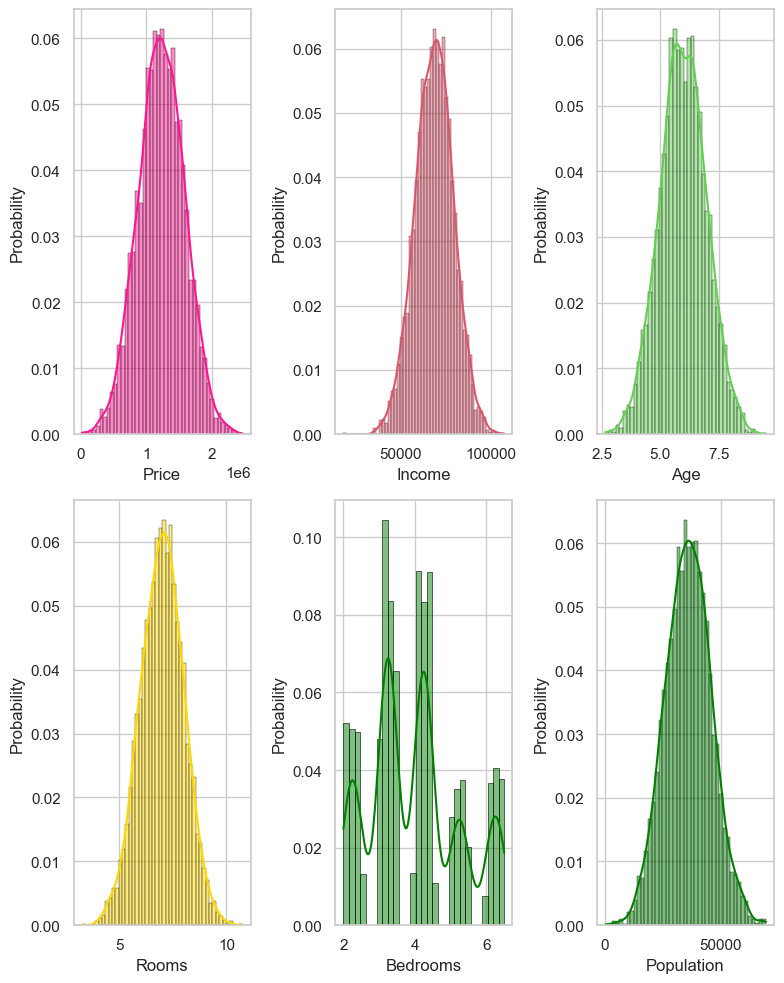

In [48]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,3, figsize = (8,10))
sns.histplot(data=House_data, x="Price",stat = "probability",kde=True, color="#FF1493",edgecolor = "black", ax=axs[0, 0])
sns.histplot(data=House_data, x="Income",stat = "probability", kde=True, color="#DF536B",edgecolor = "black", ax=axs[0, 1])
sns.histplot(data=House_data, x="Age",stat = "probability", kde=True, color="#61D04F",edgecolor = "black", ax=axs[0, 2])
sns.histplot(data=House_data, x="Rooms",stat = "probability", kde=True, color="gold",edgecolor = "black", ax=axs[1,0])
sns.histplot(data=House_data, x="Bedrooms",stat = "probability", kde=True, color="green",edgecolor = "black", ax=axs[1,1])
sns.histplot(data=House_data, x="Population",stat = "probability", kde=True, color="green",edgecolor = "black", ax=axs[1,2])
fig.tight_layout()

In [49]:
data=House_data['Bedrooms'];data

0       4.09
1       3.09
2       5.13
3       3.26
4       4.23
        ... 
4995    3.46
4996    4.02
4997    2.13
4998    5.44
4999    4.07
Name: Bedrooms, Length: 5000, dtype: float64

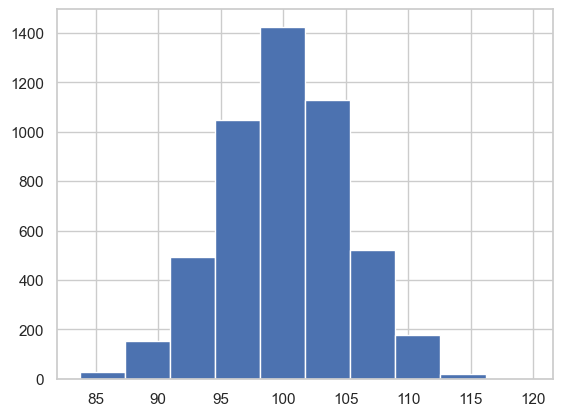

In [50]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(5000) + 100
# transform to be exponential
data = exp(data)
# power transform
data = boxcox(data, 0)
# histogram
pyplot.hist(data)
pyplot.show()

In [51]:
House_data['Bedrooms']=data;House_data

Income       Age     Rooms    Bedrooms    Population  \
0     79545.458574  5.682861  7.009188  108.121727  23086.800503   
1     79248.642455  6.002900  6.730821   96.941218  40173.072174   
2     61287.067179  5.865890  8.512727   97.359141  36882.159400   
3     63345.240046  7.188236  5.586729   94.635157  34310.242831   
4     59982.197226  5.040555  7.839388  104.327038  26354.109472   
...            ...       ...       ...         ...           ...   
4995  60567.944140  7.830362  6.137356  108.022731  22837.361035   
4996  78491.275435  6.999135  6.576763  102.833065  25616.115489   
4997  63390.686886  7.250591  4.805081   96.120061  33266.145490   
4998  68001.331235  5.534388  7.130144  105.424443  42625.620156   
4999  65510.581804  5.992305  6.792336  111.209947  46501.283803   

             Price                                            Address  
0     1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     1.058988e+06  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3     1.260617e+06                          USS Barnett\nFPO AP 44820  
4     6.309435e+05                         USNS Raymond\nFPO AE 09386  
...            ...                                                ...  
4995  1.060194e+06                   USNS Williams\nFPO AP 30153-7653  
4996  1.482618e+06              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  1.030730e+06  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998  1.198657e+06                          USS Wallace\nFPO AE 73316  
4999  1.298950e+06  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

In [52]:
del House_data['Address'];House_data

Income       Age     Rooms    Bedrooms    Population         Price
0     79545.458574  5.682861  7.009188  108.121727  23086.800503  1.059034e+06
1     79248.642455  6.002900  6.730821   96.941218  40173.072174  1.505891e+06
2     61287.067179  5.865890  8.512727   97.359141  36882.159400  1.058988e+06
3     63345.240046  7.188236  5.586729   94.635157  34310.242831  1.260617e+06
4     59982.197226  5.040555  7.839388  104.327038  26354.109472  6.309435e+05
...            ...       ...       ...         ...           ...           ...
4995  60567.944140  7.830362  6.137356  108.022731  22837.361035  1.060194e+06
4996  78491.275435  6.999135  6.576763  102.833065  25616.115489  1.482618e+06
4997  63390.686886  7.250591  4.805081   96.120061  33266.145490  1.030730e+06
4998  68001.331235  5.534388  7.130144  105.424443  42625.620156  1.198657e+06
4999  65510.581804  5.992305  6.792336  111.209947  46501.283803  1.298950e+06

[5000 rows x 6 columns]

In [53]:
X=House_data.drop(columns=['Price']);X

Income       Age     Rooms    Bedrooms    Population
0     79545.458574  5.682861  7.009188  108.121727  23086.800503
1     79248.642455  6.002900  6.730821   96.941218  40173.072174
2     61287.067179  5.865890  8.512727   97.359141  36882.159400
3     63345.240046  7.188236  5.586729   94.635157  34310.242831
4     59982.197226  5.040555  7.839388  104.327038  26354.109472
...            ...       ...       ...         ...           ...
4995  60567.944140  7.830362  6.137356  108.022731  22837.361035
4996  78491.275435  6.999135  6.576763  102.833065  25616.115489
4997  63390.686886  7.250591  4.805081   96.120061  33266.145490
4998  68001.331235  5.534388  7.130144  105.424443  42625.620156
4999  65510.581804  5.992305  6.792336  111.209947  46501.283803

[5000 rows x 5 columns]

In [54]:
y=House_data['Price'];y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

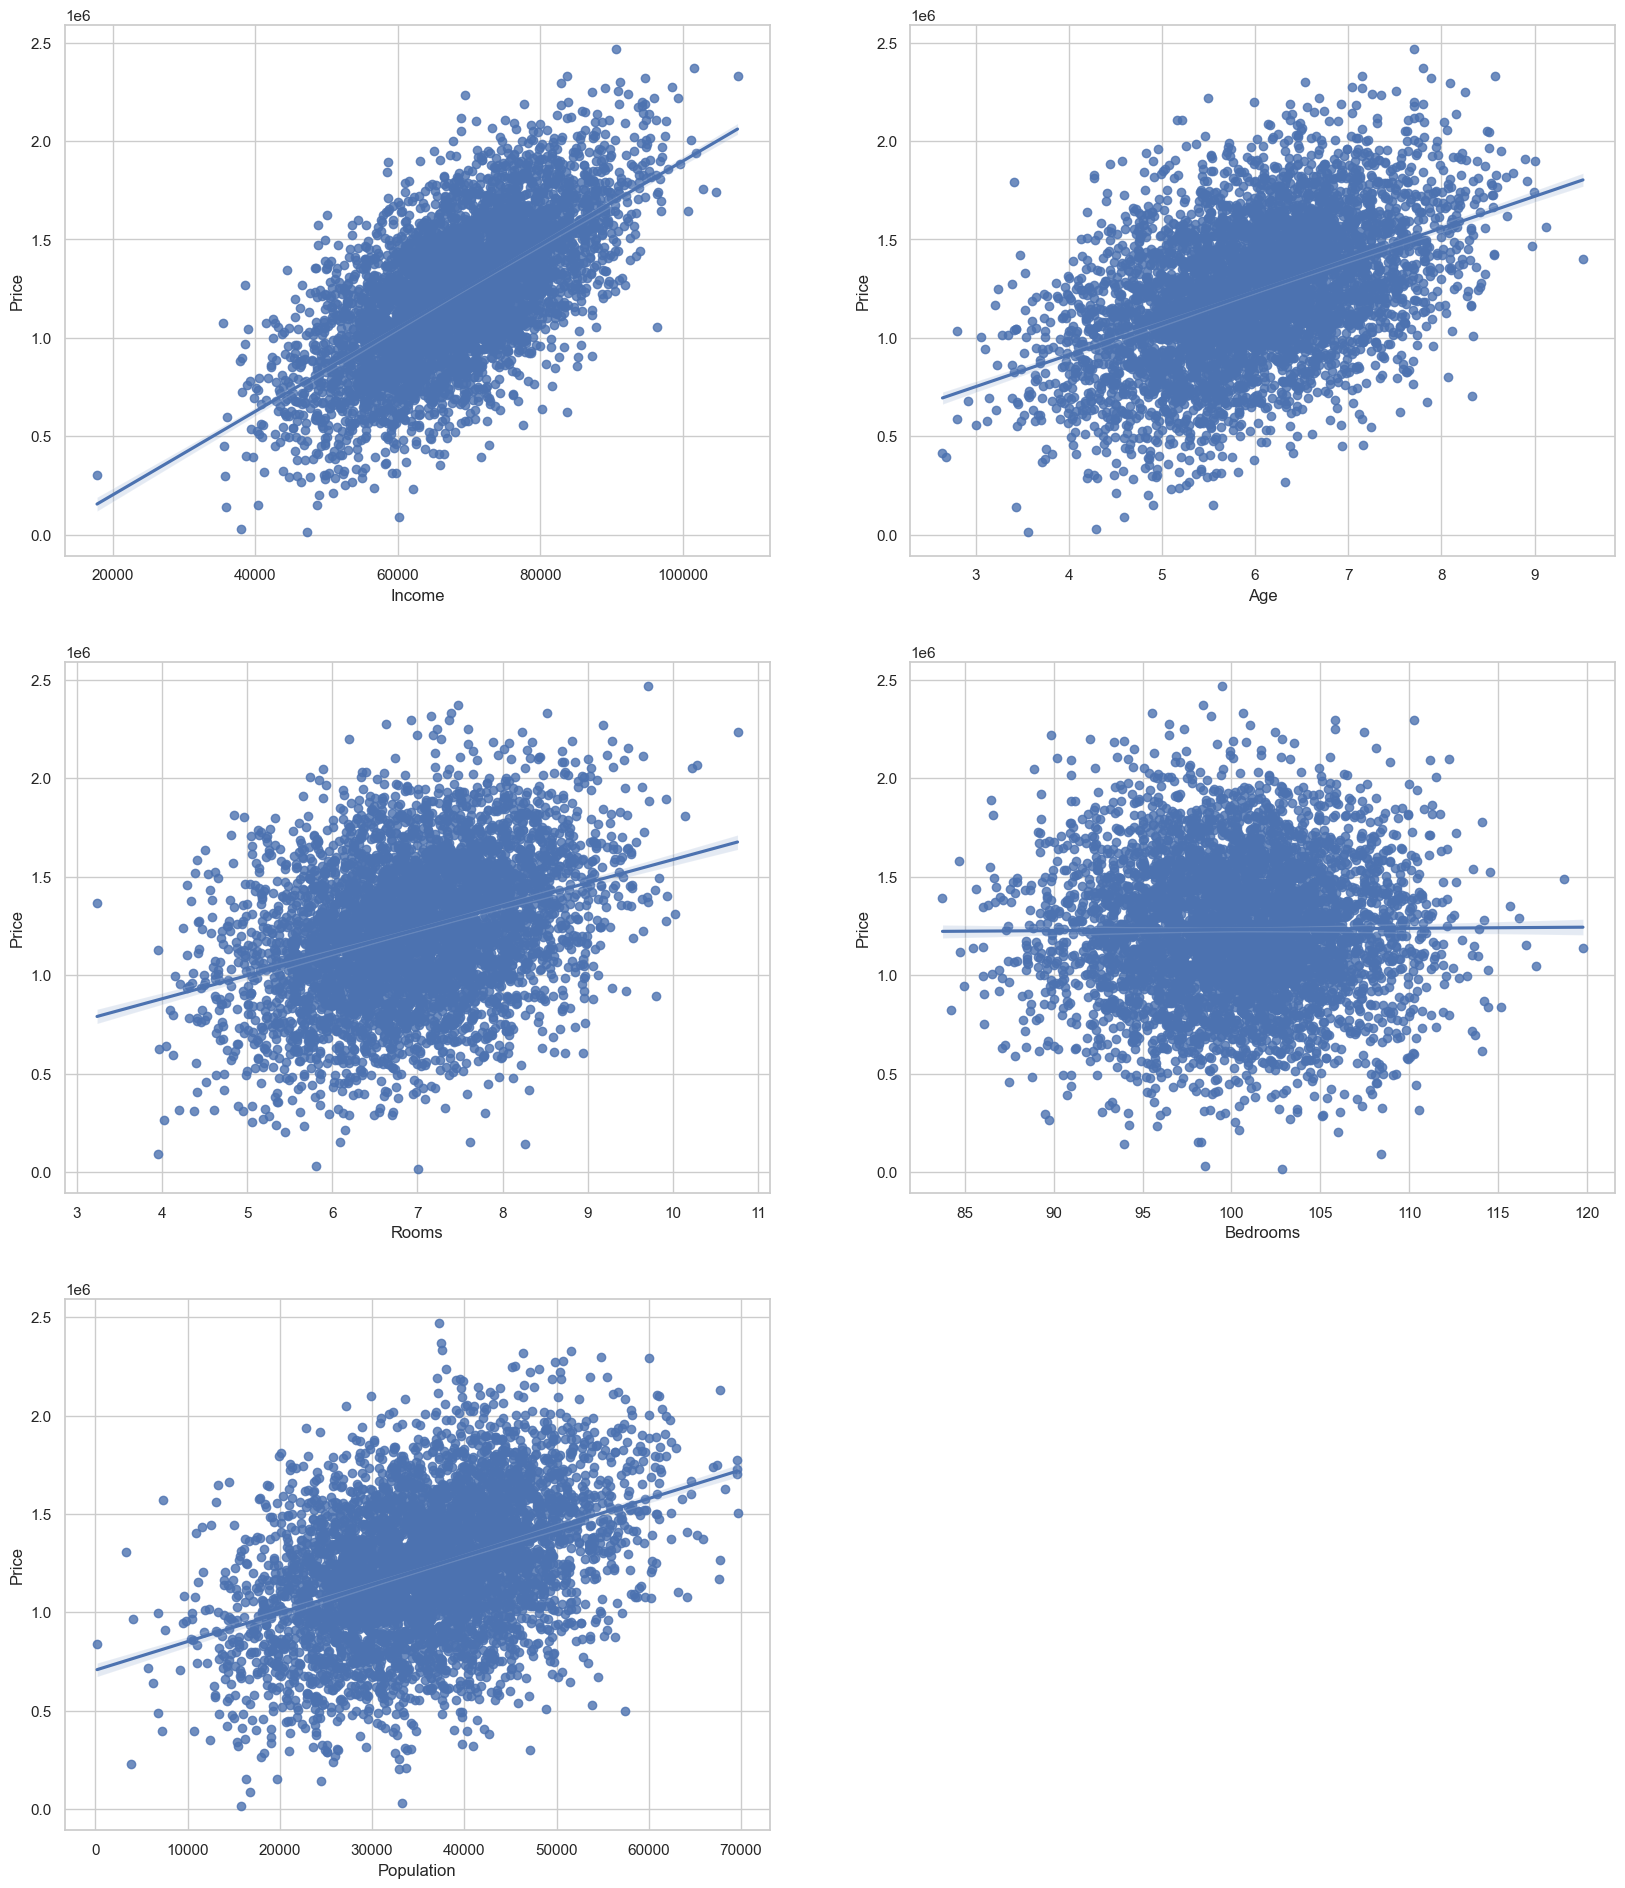

In [55]:
plt.figure(figsize=(20,40))
for i in enumerate(X.columns):
  plt.subplot(5,2,i[0]+1)
  sns.regplot(x=House_data[i[1]],y=House_data['Price'])

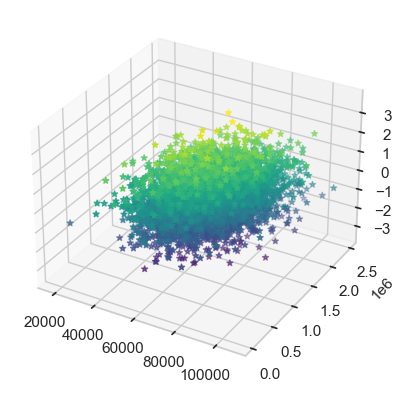

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = House_data['Income']
y = House_data['Price']
z = np.random.normal(size = 5000)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z,c=z, marker = '*',cmap = 'viridis')

# plt.show()

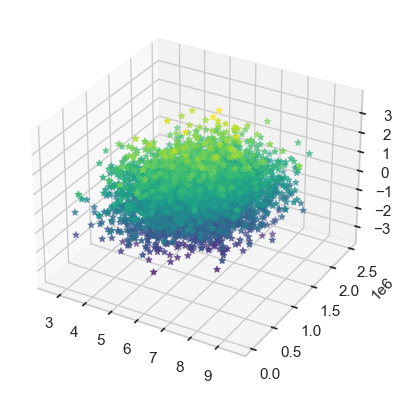

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = House_data['Age']
y = House_data['Price']
z = np.random.normal(size = 5000)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z,c=z, marker = '*',cmap = 'viridis')

# plt.show()

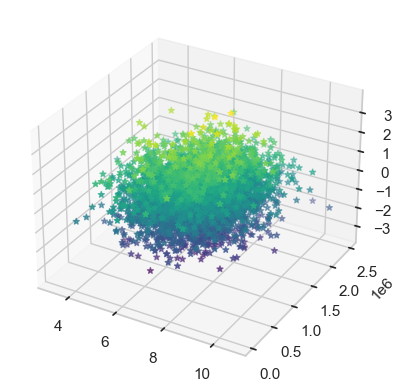

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = House_data['Rooms']
y = House_data['Price']
z = np.random.normal(size = 5000)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z,c=z, marker = '*',cmap = 'viridis')

# plt.show()

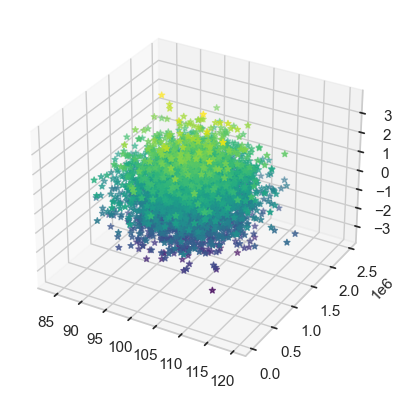

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = House_data['Bedrooms']
y = House_data['Price']
z = np.random.normal(size = 5000)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z,c=z, marker = '*',cmap = 'viridis')

# plt.show()

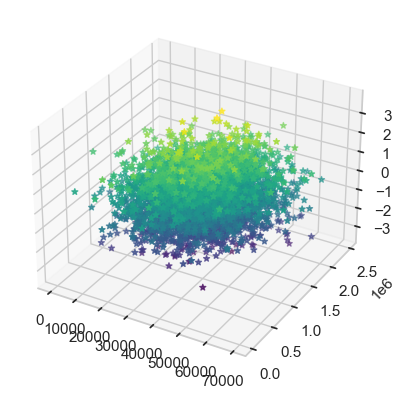

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(4072023)
x = House_data['Population']
y = House_data['Price']
z = np.random.normal(size = 5000)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

# 3D scatter plot
ax.scatter(x, y, z,c=z, marker = '*',cmap = 'viridis')

# plt.show()

<AxesSubplot: >

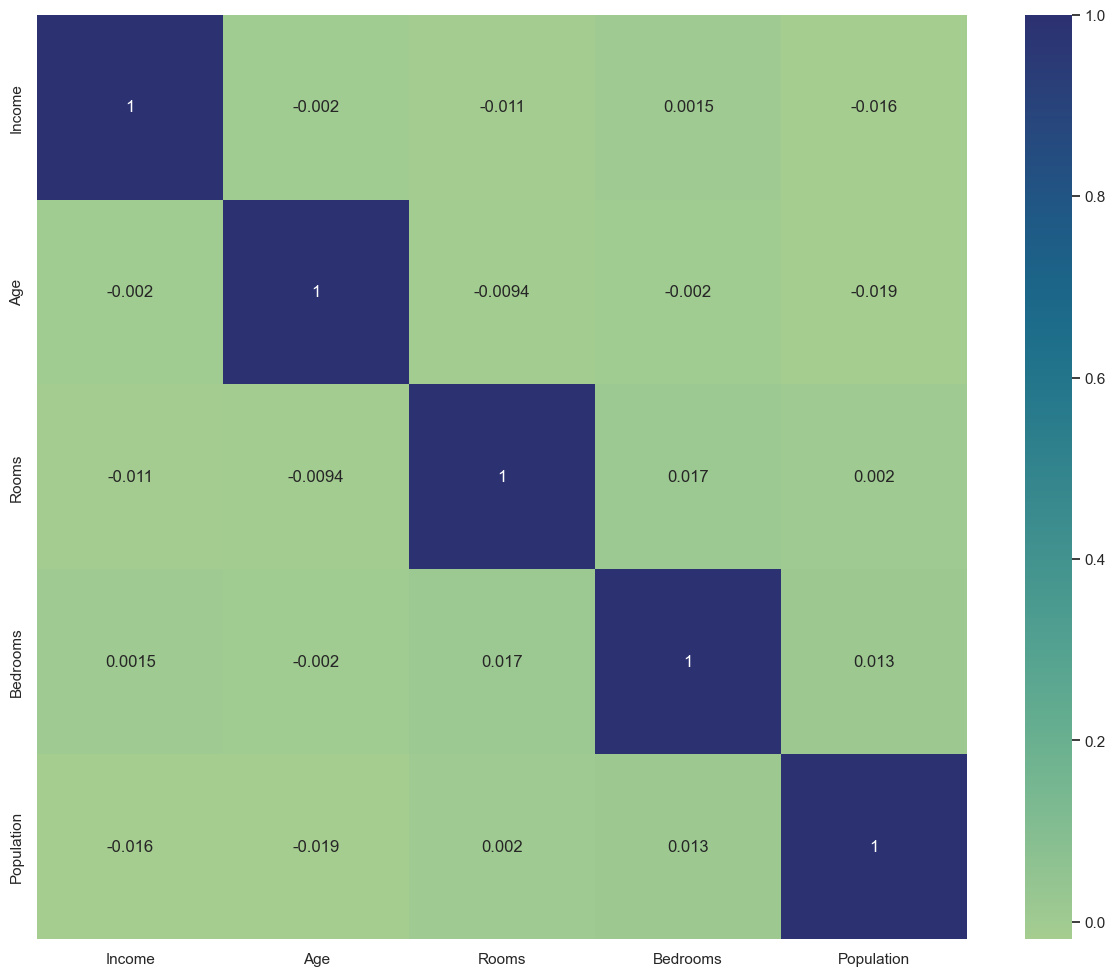

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), cmap="crest", annot=True)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X=scaler.fit_transform(X)

In [63]:
Scaled_X

array([[ 1.02865969, -0.29692705,  0.02127433,  1.59598004, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.63443866,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 , -0.55106643,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -0.79825264, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.0578944 ,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  2.21205438,  1.04162464]])

In [64]:
X_Scaled_df = pd.DataFrame(Scaled_X, columns = X.columns);X_Scaled_df

Income       Age     Rooms  Bedrooms  Population
0     1.028660 -0.296927  0.021274  1.595980   -1.317599
1     1.000808  0.025902 -0.255506 -0.634439    0.403999
2    -0.684629 -0.112303  1.516243 -0.551066    0.072410
3    -0.491499  1.221572 -1.393077 -1.094479   -0.186734
4    -0.807073 -0.944834  0.846742  0.838971   -0.988387
...        ...       ...       ...       ...         ...
4995 -0.752109  1.869297 -0.845588  1.576231   -1.342732
4996  0.929740  1.030822 -0.408686  0.540936   -1.062747
4997 -0.487235  1.284470 -2.170269 -0.798253   -0.291937
4998 -0.054592 -0.446694  0.141541  1.057894    0.651116
4999 -0.288313  0.015215 -0.194342  2.212054    1.041625

[5000 rows x 5 columns]

In [65]:
import plotly.express as px
conditions = X_Scaled_df.keys() #all conditions, df1 being my DataFrame
conditions=list(conditions)
fig = px.box(X_Scaled_df, x = conditions) 
fig.show()

In [79]:
df_cap=X_Scaled_df.copy()

In [80]:
features = ['Population','Bedrooms','Rooms','Age','Income']
from scipy import stats

In [81]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end

In [82]:
percentile_capping(df_cap, features, 0.01, 0.01)

In [83]:
import plotly.express as px
conditions = df_cap.keys() #all conditions, df1 being my DataFrame
conditions=list(conditions)
fig = px.box(df_cap, x = conditions) 
fig.show()

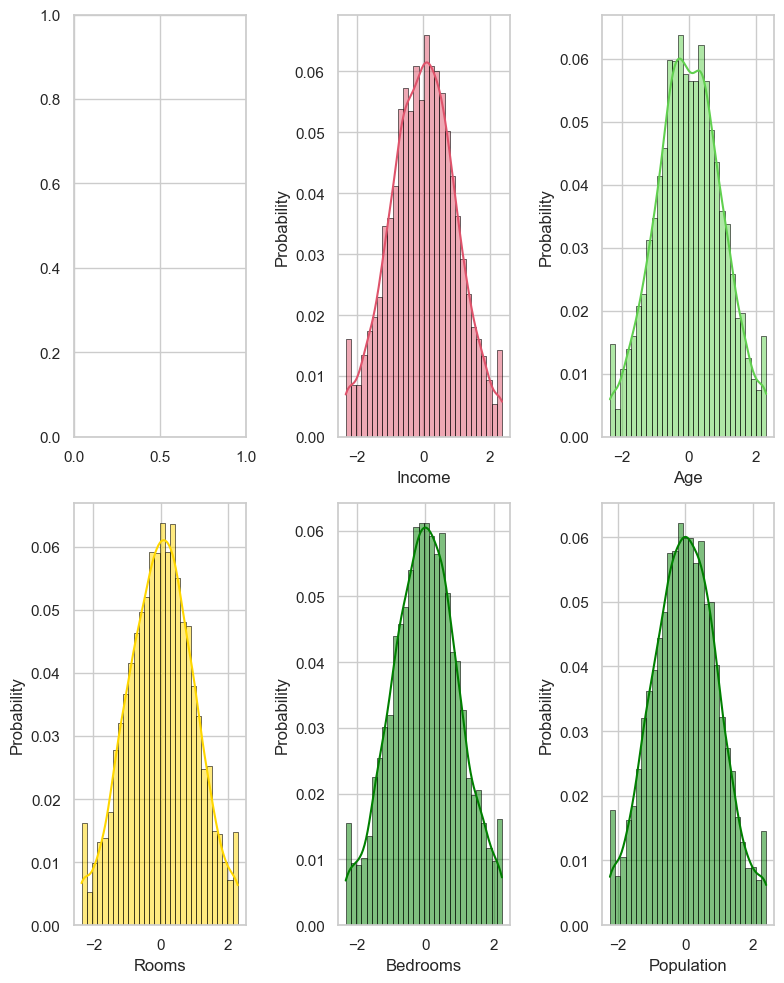

In [85]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,3, figsize = (8,10))
sns.histplot(data=df_cap, x="Income",stat = "probability", kde=True, color="#DF536B",edgecolor = "black", ax=axs[0, 1])
sns.histplot(data=df_cap, x="Age",stat = "probability", kde=True, color="#61D04F",edgecolor = "black", ax=axs[0, 2])
sns.histplot(data=df_cap, x="Rooms",stat = "probability", kde=True, color="gold",edgecolor = "black", ax=axs[1,0])
sns.histplot(data=df_cap, x="Bedrooms",stat = "probability", kde=True, color="green",edgecolor = "black", ax=axs[1,1])
sns.histplot(data=df_cap, x="Population",stat = "probability", kde=True, color="green",edgecolor = "black", ax=axs[1,2])
fig.tight_layout()

In [103]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    x=df_cap[['Income', 'Age', 'Rooms','Bedrooms','Population']]
    # the calculation of variance inflation requires a constant
    x['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [104]:
compute_vif(['Income', 'Age', 'Rooms','Bedrooms','Population'])

Variable       VIF
0      Income  1.000342
1         Age  1.000434
2       Rooms  1.000565
3    Bedrooms  1.000473
4  Population  1.000641

In [105]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

Coefficients:  [233105.58026084 166957.67455327 125953.45444385  -1368.93274613
 153158.33848856]
Variance score: 0.9135099717576591


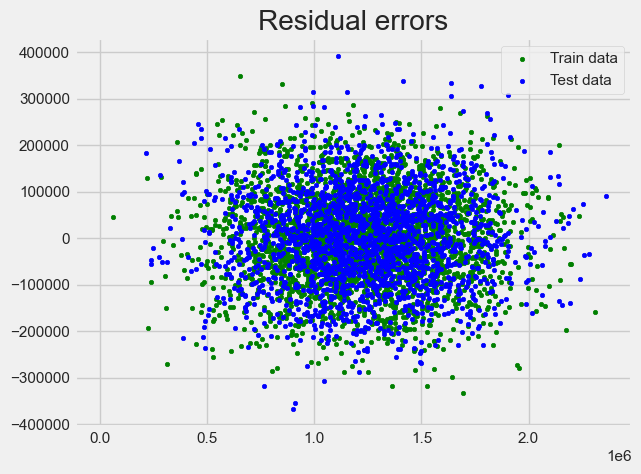

In [106]:
X_train, X_test,y_train, y_test = train_test_split(df_cap, y, test_size=0.4, random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [108]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred=model.predict(X_test);y_pred

array([1558584.66251098, 1588785.09277697,  932959.60034528, ...,
       1140575.13542419,  391138.36535326, 1171960.28791791])

In [112]:
model.score(X_test,y_test)

0.9135099717576591

In [113]:
1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9132930960599601

In [115]:
df_cap1=df_cap.drop(columns=['Bedrooms']);df_cap1

Income       Age     Rooms  Population
0     1.028660 -0.296927  0.021274   -1.317599
1     1.000808  0.025902 -0.255506    0.403999
2    -0.684629 -0.112303  1.516243    0.072410
3    -0.491499  1.221572 -1.393077   -0.186734
4    -0.807073 -0.944834  0.846742   -0.988387
...        ...       ...       ...         ...
4995 -0.752109  1.869297 -0.845588   -1.342732
4996  0.929740  1.030822 -0.408686   -1.062747
4997 -0.487235  1.284470 -2.170269   -0.291937
4998 -0.054592 -0.446694  0.141541    0.651116
4999 -0.288313  0.015215 -0.194342    1.041625

[5000 rows x 4 columns]

Coefficients:  [233066.80079783 166959.22388317 125920.88564066 153139.40349314]
Variance score: 0.9134745542727956


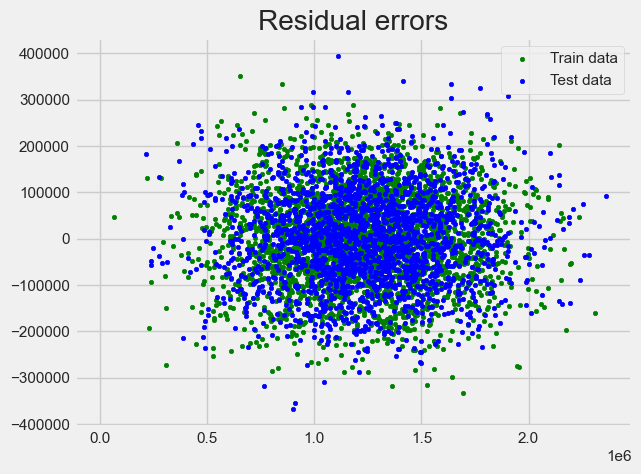

In [116]:
X_train, X_test,y_train, y_test = train_test_split(df_cap1, y, test_size=0.4, random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
# setting plot style
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')
 
# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()

In [117]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred1=model1.predict(X_test);y_pred1

array([1557329.49403114, 1588626.87152519,  931305.03042666, ...,
       1138400.022816  ,  392613.43284866, 1169505.57524348])

In [119]:
model1.score(X_test,y_test)

0.9134745542727956

In [120]:
1 - (1-model1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9133010696698337

In [122]:
residual=y_pred1-y_test;residual

2764    143749.677280
4767    -30094.266905
3814     89912.537399
3499     56554.742044
2735      9193.660344
            ...      
4372   -132237.815875
3401      1371.456151
1239    -35013.527176
437     100889.187238
415    -227836.280750
Name: Price, Length: 2000, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_7220\143481073.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Price', ylabel='Density'>

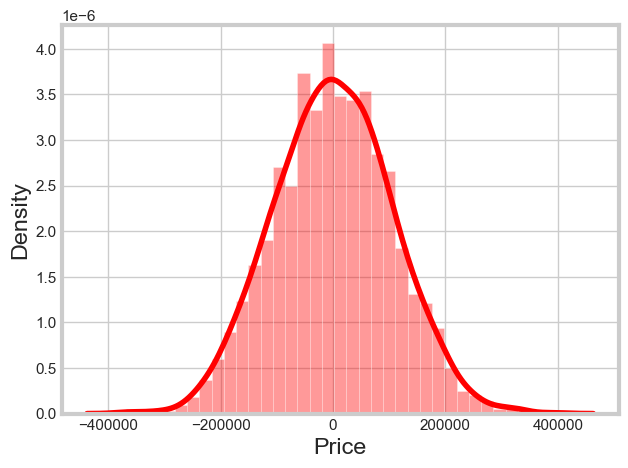

In [123]:
sns.set_style('whitegrid')
sns.distplot(residual, kde = True, color ='red')

In [128]:
from scipy.stats import shapiro
shapiro(residual)

ShapiroResult(statistic=0.9994539022445679, pvalue=0.8653896450996399)

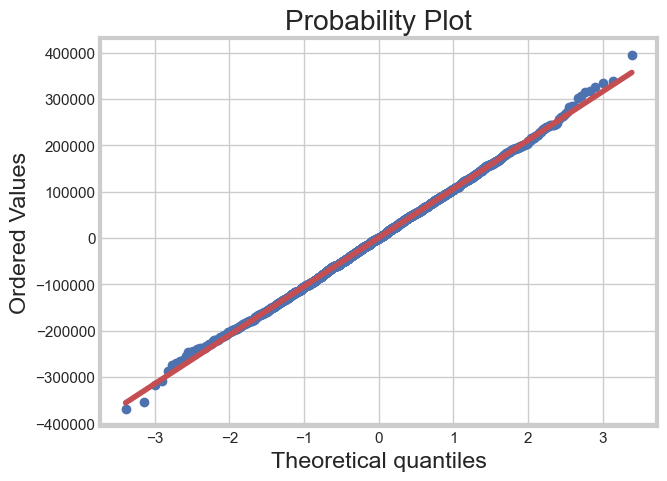

In [129]:
import pylab 
import scipy.stats as stats
stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

In [130]:
from statsmodels.stats.stattools import durbin_watson 
durbin_watson(residual)

2.0680944357405036

<AxesSubplot: ylabel='Price'>

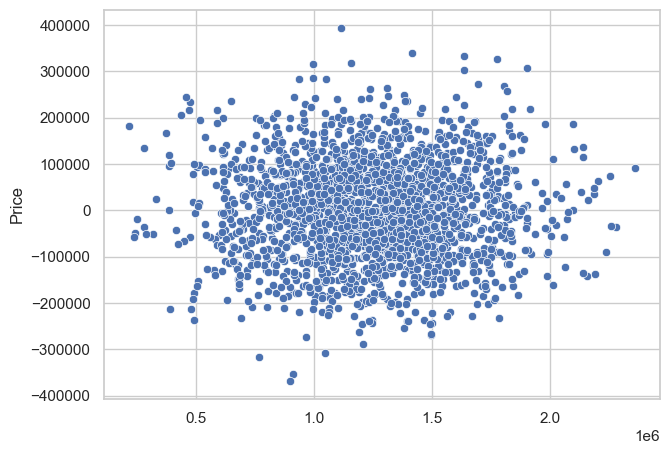

In [132]:
import seaborn
seaborn.set(style='whitegrid')
seaborn.scatterplot(x=y_pred1,
                    y=residual)

In [134]:
data=pd.concat([df_cap1,y], axis=1, join='inner');data

Income       Age     Rooms  Population         Price
0     1.028660 -0.296927  0.021274   -1.317599  1.059034e+06
1     1.000808  0.025902 -0.255506    0.403999  1.505891e+06
2    -0.684629 -0.112303  1.516243    0.072410  1.058988e+06
3    -0.491499  1.221572 -1.393077   -0.186734  1.260617e+06
4    -0.807073 -0.944834  0.846742   -0.988387  6.309435e+05
...        ...       ...       ...         ...           ...
4995 -0.752109  1.869297 -0.845588   -1.342732  1.060194e+06
4996  0.929740  1.030822 -0.408686   -1.062747  1.482618e+06
4997 -0.487235  1.284470 -2.170269   -0.291937  1.030730e+06
4998 -0.054592 -0.446694  0.141541    0.651116  1.198657e+06
4999 -0.288313  0.015215 -0.194342    1.041625  1.298950e+06

[5000 rows x 5 columns]

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.342e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:34:05   Log-Likelihood:                -64808.
No. Observations:                5000   AIC:                         1.296e+05
Df Residuals:                    4995   BIC:                         1.297e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.232e+06   1457.742    845.052      0.0

C:\Users\HP\AppData\Local\Temp\ipykernel_7220\3191135741.py:26: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.



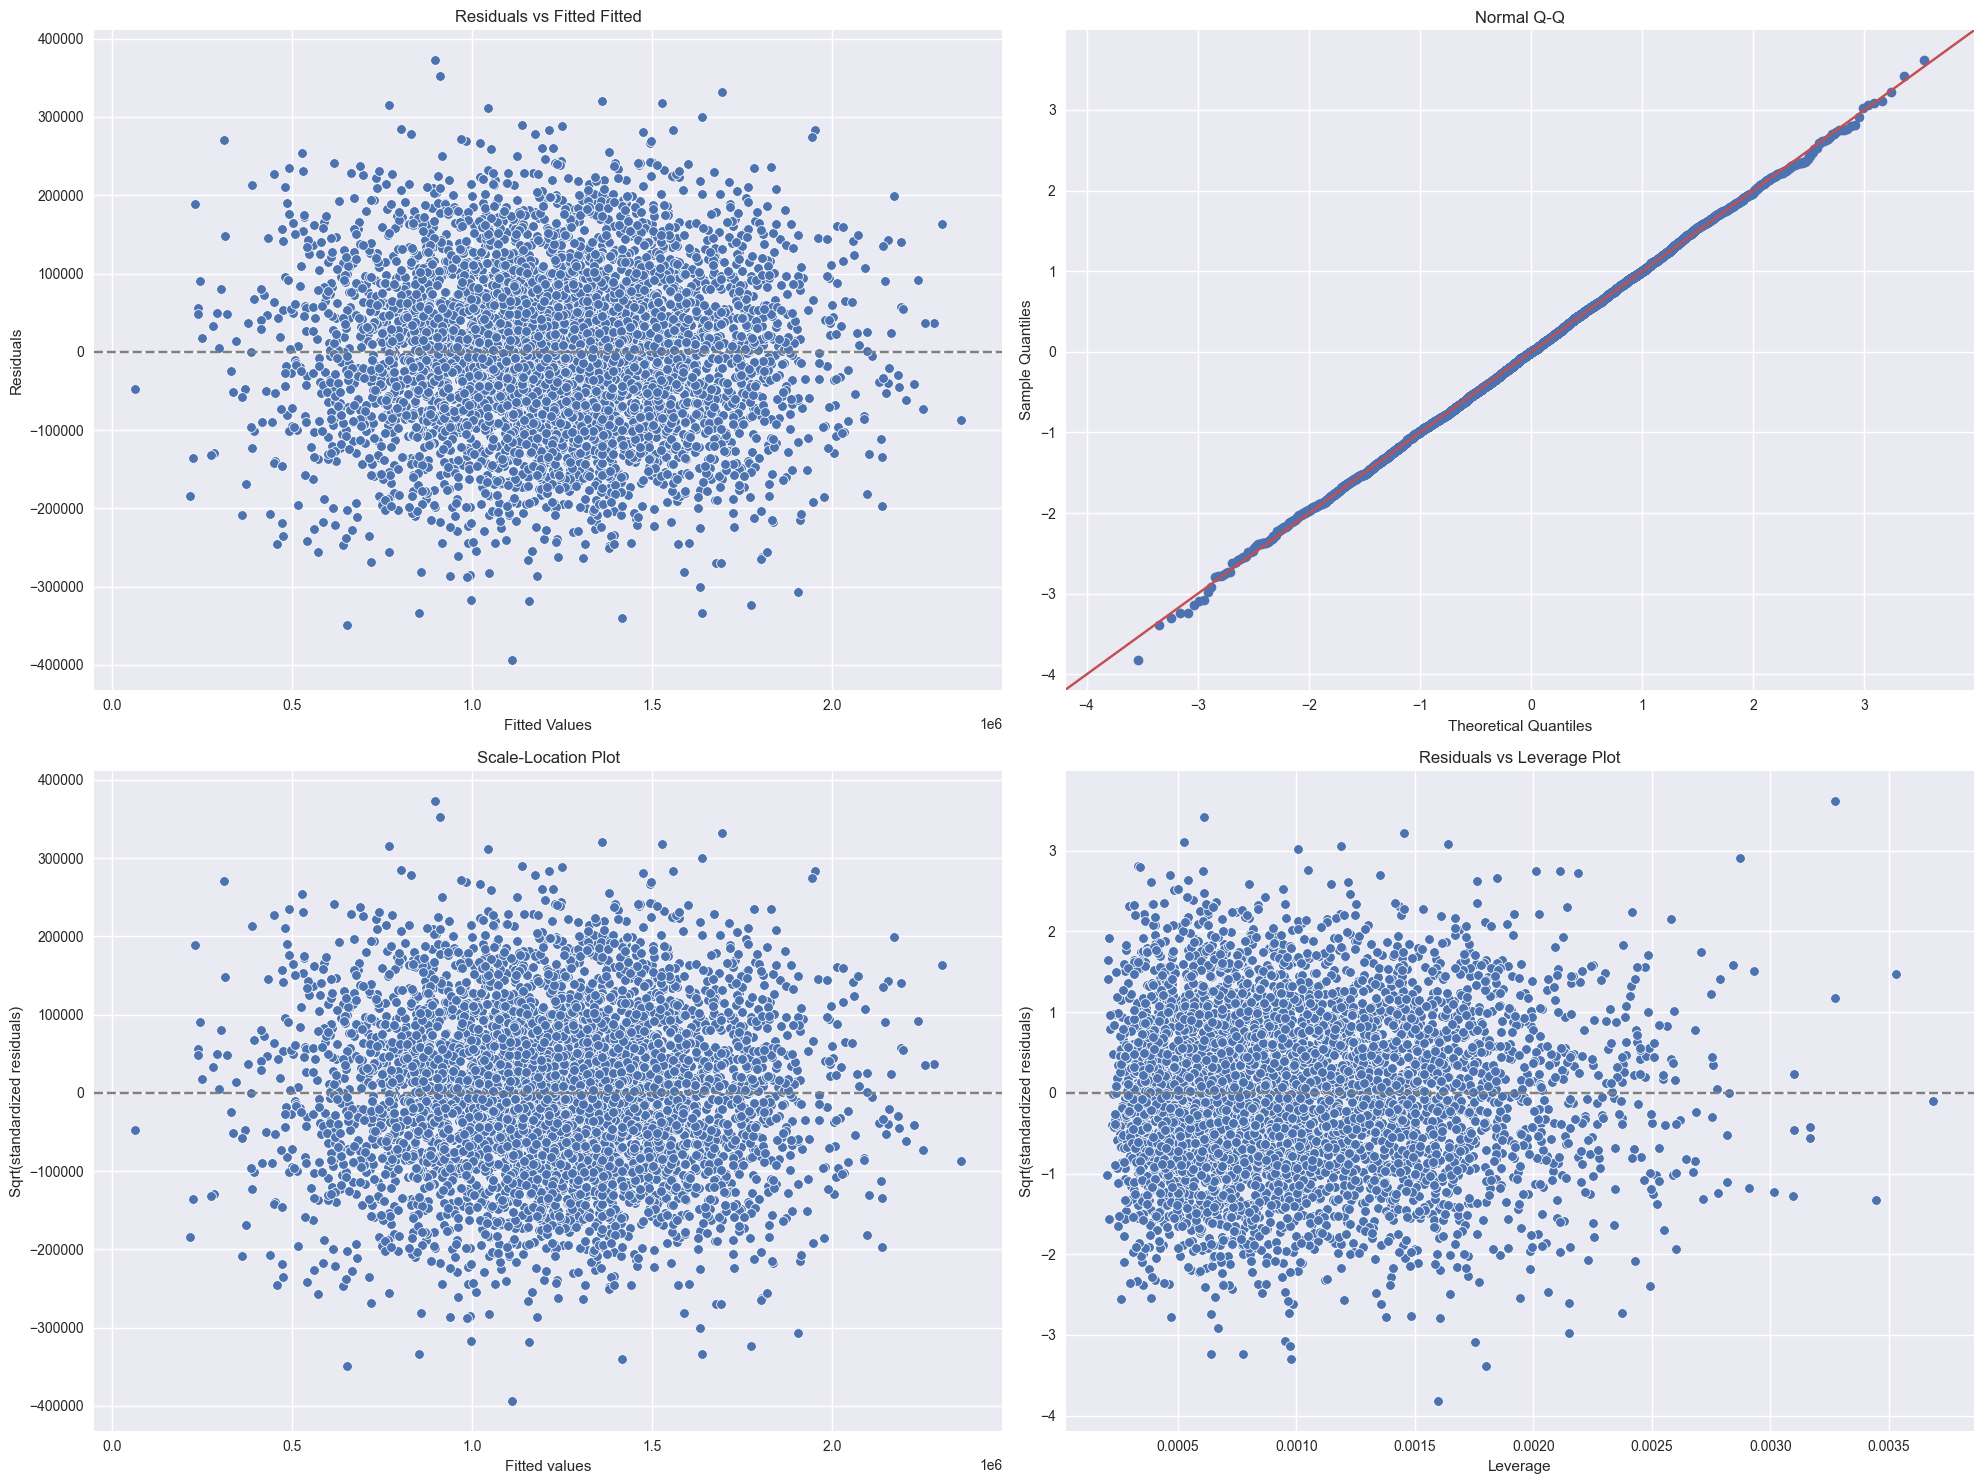

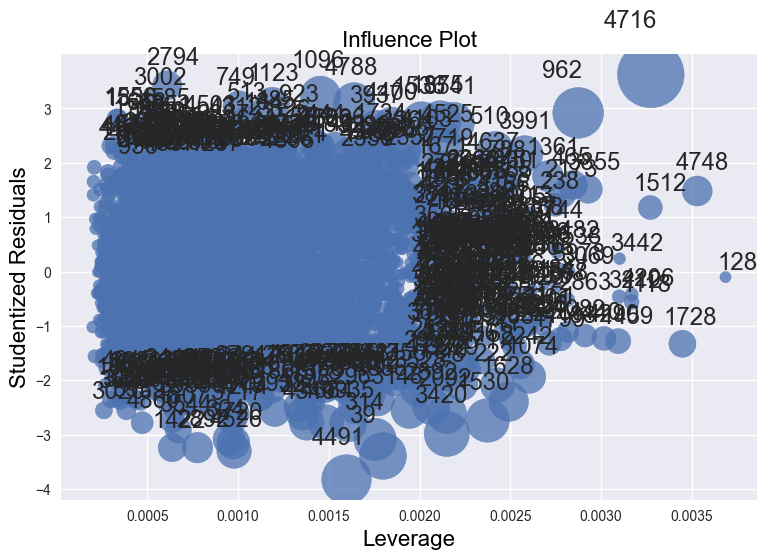

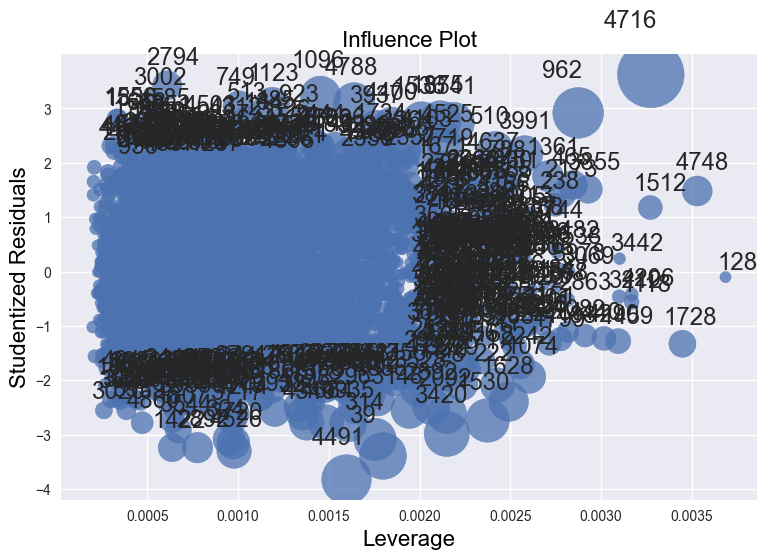

In [137]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sms
# Load Real State Data 

# Fit a OLS regression variable 
model =smf.ols(formula=' Price~ Income + Age+Rooms+Population', data= data ) 
results = model.fit() 
print(results.summary()) 

# Get different Variables for diagnostic 
residuals = results.resid 
fitted_value = results.fittedvalues 
stand_resids = results.resid_pearson 
influence = results.get_influence() 
leverage = influence.hat_matrix_diag 

# PLot different diagnostic plots 
plt.rcParams["figure.figsize"] = (20,15) 
fig, ax = plt.subplots(nrows=2, ncols=2) 

plt.style.use('seaborn') 

# Residual vs Fitted Plot 
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0]) 
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed') 
ax[0, 0].set_xlabel('Fitted Values') 
ax[0, 0].set_ylabel('Residuals') 
ax[0, 0].set_title('Residuals vs Fitted Fitted') 

# Normal Q-Q plot 
sm.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0') 
ax[0, 1].set_title('Normal Q-Q') 

# Scale-Location Plot 
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0]) 
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed') 
ax[1, 0].set_xlabel('Fitted values') 
ax[1, 0].set_ylabel('Sqrt(standardized residuals)') 
ax[1, 0].set_title('Scale-Location Plot') 

# Residual vs Leverage Plot 
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1]) 
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed') 
ax[1, 1].set_xlabel('Leverage') 
ax[1, 1].set_ylabel('Sqrt(standardized residuals)') 
ax[1, 1].set_title('Residuals vs Leverage Plot') 


plt.tight_layout() 
plt.show() 

# PLot Cook's distance plot 
sm.graphics.influence_plot(results, criterion="cooks") 


In [143]:
from statsmodels.compat import lzip

In [144]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 7.808978153478474),
 ('p-value', 0.09883157375012576),
 ('f-value', 1.9533430164195673),
 ('f p-value', 0.09883739843296972)]